Status - credit status
    status_values = {
    1: 'ok', 
    2:'default', 
    0:'unknown'
    }

Seniority - job seniority (years)

Home - type of home ownership
    home_values = {
        1: 'rent',
        2: 'owner',
        3: 'private',
        4: 'ignore',
        5: 'parents',
        6: 'other',
        0: 'unknown'
    }

Time - time of requested loan

Age - client's age

Marital - marital status
    marital_values = {
        1: 'single',
        2: 'married',
        3: 'widow',
        4: 'separated',
        5: 'divorced',
        0: 'unknown'
    }

Records - existence of records
    records_values = {
        1: 'no',
        2: 'yes',
        0: 'unknown'
    }

Job - type of job
    job_values = {
        1: 'fixed',
        2: 'partime',
        3: 'freelance',
        4: 'others',
        0: 'unknown'
    }

Expenses - amount of expenses

Income - amount of income

Assets - amount of assets

Debt - amount of debt

Amount - amount requested of loan

Price - price of good

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('CreditScoring.csv')
df

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,2,1,1,60,39,2,1,1,69,92,0,0,900,1020
4451,1,22,2,60,46,2,1,1,60,75,3000,600,950,1263
4452,2,0,2,24,37,2,1,2,60,90,3500,0,500,963
4453,1,0,1,48,23,1,1,3,49,140,0,0,550,550


In [3]:
df.describe().round()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,1.0,8.0,3.0,46.0,37.0,2.0,1.0,2.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,0.0,8.0,2.0,15.0,11.0,1.0,0.0,1.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,0.0,0.0,6.0,18.0,0.0,1.0,0.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,1.0,2.0,2.0,36.0,28.0,2.0,1.0,1.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,1.0,5.0,2.0,48.0,36.0,2.0,1.0,1.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,2.0,12.0,4.0,60.0,45.0,2.0,1.0,3.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,2.0,48.0,6.0,72.0,68.0,5.0,2.0,4.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [4]:
df.shape

(4455, 14)

In [5]:
df.columns = df.columns.str.lower()
df

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,2,1,1,60,39,2,1,1,69,92,0,0,900,1020
4451,1,22,2,60,46,2,1,1,60,75,3000,600,950,1263
4452,2,0,2,24,37,2,1,2,60,90,3500,0,500,963
4453,1,0,1,48,23,1,1,3,49,140,0,0,550,550


In [6]:
status_values = {
    1: 'ok', 
    2:'default', 
    0:'unknown'
    }
df.status = df.status.map(status_values)

home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unknown'
}
df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unknown'
}
df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unknown'
}
df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unknown'
}
df.job = df.job.map(job_values)

In [10]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


c:\Users\Monika\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Monika\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\Monika\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Monika\AppData\Local\Programs\Python\Pytho

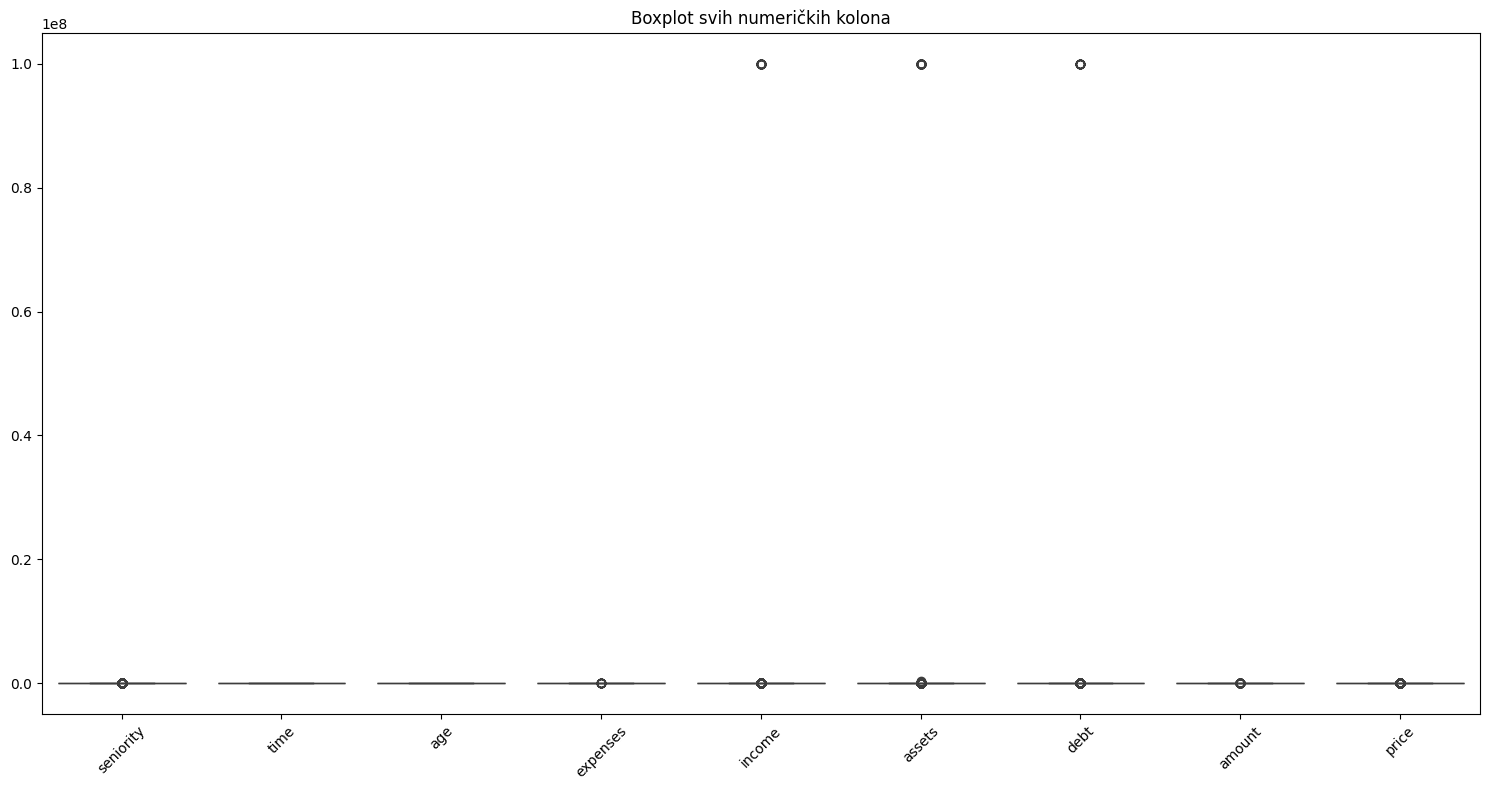

In [7]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("Boxplot svih numeričkih kolona")
plt.tight_layout()
plt.show()


In [8]:
df.isna().sum()

status       0
seniority    0
home         0
time         0
age          0
marital      0
records      0
job          0
expenses     0
income       0
assets       0
debt         0
amount       0
price        0
dtype: int64

In [9]:
for col in ['income', 'assets', 'debt']:
    mean = df[col].mean()
    median = df[col].median()
    print(col)
    print(f'Mean: {mean}')
    print(f'Meadian: {median}')
    print()

income
Mean: 763316.9939393939
Meadian: 120.0

assets
Mean: 1060340.8058361392
Meadian: 3500.0

debt
Mean: 404381.962962963
Meadian: 0.0



In [11]:
for col in ['income', 'assets', 'debt']:
    df[col] = df[col].replace(to_replace = df[col].max(), value = df[col].median())

c:\Users\Monika\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Monika\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\Monika\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Monika\AppData\Local\Programs\Python\Pytho

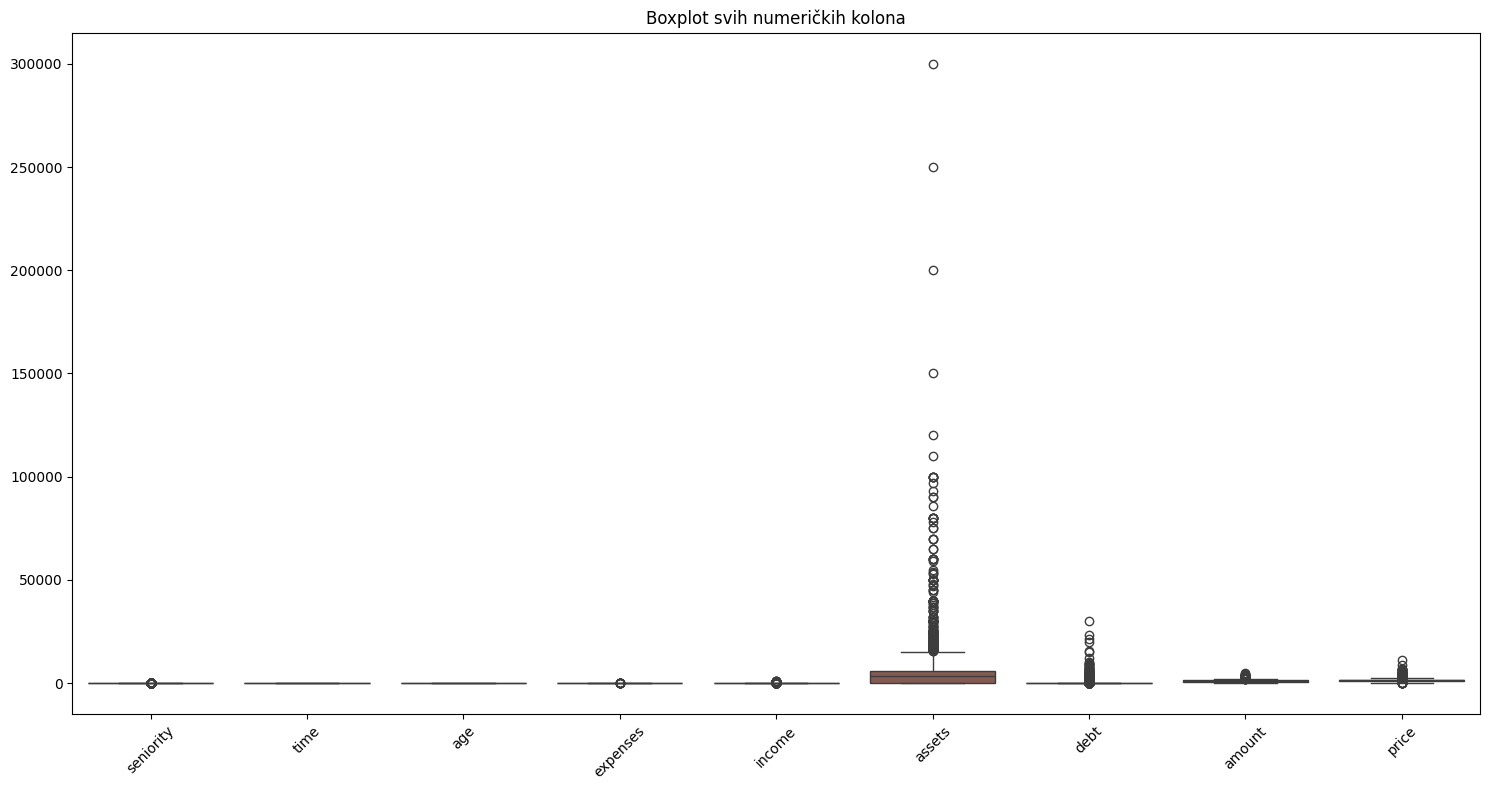

In [12]:

plt.figure(figsize=(15, 8))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("Boxplot svih numeričkih kolona")
plt.tight_layout()
plt.show()


In [13]:
df.nunique()

status          3
seniority      47
home            7
time           11
age            50
marital         6
records         2
job             5
expenses       94
income        352
assets        159
debt          182
amount        285
price        1419
dtype: int64

In [14]:
for col in ['status', 'home', 'marital', 'records', 'job']:
    value_counts = df[col].value_counts()
    print(value_counts)

status
ok         3200
default    1254
unknown       1
Name: count, dtype: int64
home
owner      2107
rent        973
parents     783
other       319
private     247
ignore       20
unknown       6
Name: count, dtype: int64
marital
married      3241
single        978
separated     130
widow          67
divorced       38
unknown         1
Name: count, dtype: int64
records
no     3682
yes     773
Name: count, dtype: int64
job
fixed        2806
freelance    1024
partime       452
others        171
unknown         2
Name: count, dtype: int64


In [15]:
df = df[df['status'] != 0]
df.shape

(4455, 14)

In [14]:
# for kolona in df.columns:
#     plt.figure(figsize=(6, 4))
#     sns.histplot(df[kolona], kde=True, bins=30, color='skyblue')
#     plt.title(f'Raspodela vrednosti - {kolona}')
#     plt.xlabel(kolona)
#     plt.ylabel('Frekvencija')
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()


In [ ]:
# corr = df.corr()

# plt.figure(figsize=(10, 8))
# sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title("Korelacija između kolona")
# plt.show()

ValueError: could not convert string to float: 'ok'

In [16]:
df = pd.get_dummies(df, columns=['home', 'marital', 'records', 'job'], drop_first=True)

In [17]:
df['status'] = df['status'].replace({1: 0, 2: 1})

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
df['expenses_to_income_ratio'] = df['expenses'] / df['income'].replace(0, 1)
df['amount_to_income'] = df['amount'] / df['income'].replace(0, 1)
df['price_to_income'] = df['price'] / df['income'].replace(0, 1)
df['assets_to_debt'] = df['assets'] / df['debt'].replace(0, 1)


In [20]:
df_full_train, df_test = train_test_split(df, test_size= 0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

In [21]:
df_train.reset_index(drop=True)
df_val.reset_index(drop=True)
df_test.reset_index(drop=True)

,status,seniority,time,age,expenses,income,assets,debt,amount,price,...,marital_5,records_2,job_1,job_2,job_3,job_4,expenses_to_income_ratio,amount_to_income,price_to_income,assets_to_debt
0,1,3,36,26,35,0,60000,3000,800,1000,...,False,False,False,False,True,False,35.000000,800.000000,1000.000000,20.000000
1,0,10,60,28,78,325,18,3000,2250,2250,...,False,False,True,False,False,False,0.240000,6.923077,6.923077,0.006000
2,0,14,60,41,53,181,0,0,1150,2497,...,False,False,True,False,False,False,0.292818,6.353591,13.795580,0.000000
3,0,4,60,39,45,0,7500,0,1300,1508,...,False,False,False,False,True,False,45.000000,1300.000000,1508.000000,7500.000000
4,1,1,30,20,35,90,0,0,450,500,...,False,False,True,False,False,False,0.388889,5.000000,5.555556,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,19,12,42,90,464,5000,0,1100,2413,...,False,False,True,False,False,False,0.193966,2.370690,5.200431,5000.000000
887,0,7,36,24,45,95,3000,0,1000,1597,...,False,False,True,False,False,False,0.473684,10.526316,16.810526,3000.000000
888,0,0,24,28,45,219,6000,0,600,943,...,False,False,False,True,False,False,0.205479,2.739726,4.305936,6000.000000
889,1,8,36,30,75,100,4000,1365,1220,1745,...,False,True,False,False,True,False,0.750000,12.200000,17.450000,2.930403


In [22]:
y_train = df_train['status']
y_val = df_val['status']
y_test = df_test['status']

In [23]:
X_train = df_train.drop('status', axis = 1)
X_val = df_val.drop('status', axis = 1)
X_test = df_test.drop('status', axis = 1)

<Axes: title={'center': 'Feature Importances'}>

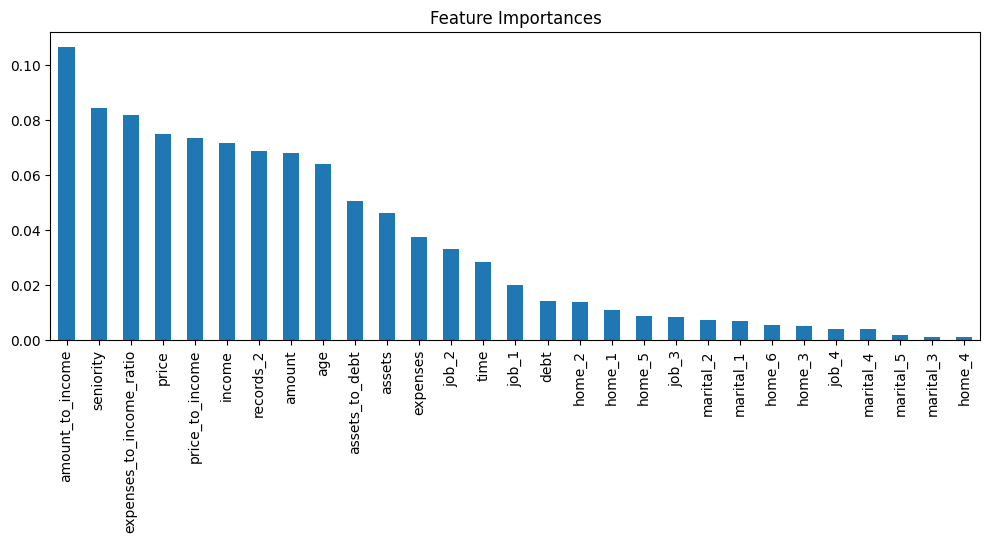

In [24]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

importances = pd.Series(model.feature_importances_, index=X_train.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(12, 4), title='Feature Importances')


<Axes: >

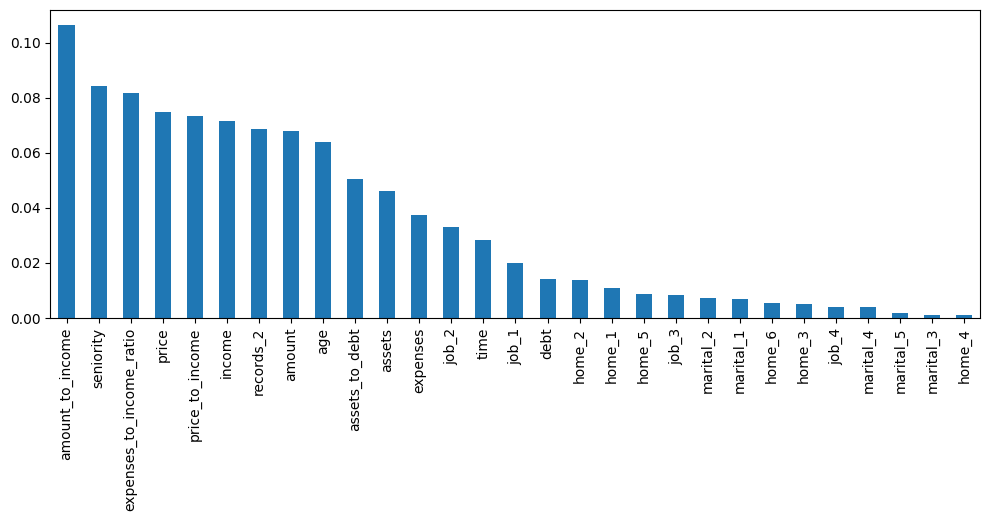

In [25]:
importances = pd.Series(model.feature_importances_, index=X_train.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(12, 4))


In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer #for categorical variables

In [27]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [28]:
from sklearn.metrics import roc_auc_score

In [29]:
y_val_pred = dt.predict_proba(X_val)[:, 1]

In [30]:
roc_auc_score(y_val, y_val_pred)

0.6458217287060134

In [31]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [32]:
y_train_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_train_pred)
print('train: ', auc)

y_val_pred = dt.predict_proba(X_val)[:, 1] 
auc = roc_auc_score(y_val, y_val_pred) 
print('val: ', auc)  #with max_depth = 3 our model performes better, there is no overfitting

train:  0.7844325671793139
val:  0.7523733985614298


In [33]:
scores = []

for d in [4, 5, 6, 7, 10, 15, 20, None]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:
        dt = DecisionTreeClassifier(max_depth = d, min_samples_leaf = s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, s, auc))

df_scores = pd.DataFrame(scores, columns = ['max_depth', 'min_samples_leaf', 'auc']) 
df_scores.sort_values(by = 'auc', ascending=False)

,max_depth,min_samples_leaf,auc
13,5.0,15,0.796221
12,5.0,10,0.794314
14,5.0,20,0.789415
24,6.0,100,0.788192
33,7.0,100,0.786991
...,...,...,...
46,15.0,2,0.677312
45,15.0,1,0.650299
36,10.0,1,0.642607
54,20.0,1,0.636446


In [34]:
dt = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10)
dt.fit(X_train, y_train)

y_train_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_train_pred)
print('train: ', auc)

y_val_pred = dt.predict_proba(X_val)[:, 1] 
auc = roc_auc_score(y_val, y_val_pred) 
print('val: ', auc) 

train:  0.851722790265337
val:  0.7943135307936354


In [35]:
scores = []

for d in [20, 30, 50, 100, 150]:
    for depth in [5, 6, 7, 10]:
        for leaf in [5, 10, 15, 20]:
            rf = RandomForestClassifier(n_estimators = d, max_depth = depth, min_samples_leaf = leaf)
            rf.fit(X_train, y_train)

            y_pred = rf.predict_proba(X_val)[:, 1]
            auc = roc_auc_score(y_val, y_pred)

            scores.append((d, depth, leaf, auc))

df_scores = pd.DataFrame(scores, columns = ['n_estimators', 'max_depth', 'min_samples_leaf', 'auc']) 
df_scores.sort_values(by = 'auc', ascending=False)

,n_estimators,max_depth,min_samples_leaf,auc
29,30,10,10,0.833926
60,100,10,5,0.832600
41,50,7,10,0.832267
77,150,10,10,0.831716
76,150,10,5,0.831013
...,...,...,...,...
1,20,5,10,0.817754
3,20,5,20,0.816873
14,20,10,15,0.816119
7,20,6,20,0.814478


In [36]:
dt = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10)
dt.fit(X_train, y_train)

y_train_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_train_pred)
print('train: ', auc)

y_val_pred = dt.predict_proba(X_val)[:, 1] 
auc = roc_auc_score(y_val, y_val_pred) 
print('val: ', auc) 

train:  0.851722790265337
val:  0.7922973529340535


In [37]:
rf = RandomForestClassifier(n_estimators = 150, max_depth =7, min_samples_leaf = 10, random_state=42)
rf.fit(X_train, y_train)

y_train_pred = rf.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_train_pred)
print('train: ', auc)

y_val_pred = rf.predict_proba(X_val)[:, 1] 
auc = roc_auc_score(y_val, y_val_pred) 
print('val: ', auc) 

train:  0.9065109007943215
val:  0.8275623017122375


In [38]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Definiši model
rf1 = RandomForestClassifier(random_state=42)

# Definiši prostor pretrage hiperparametara
param_dist = {
    'n_estimators': randint(50, 300),         # između 50 i 300 stabala
    'max_depth': randint(4, 10),              # između 4 i 10 dubine stabla
    'min_samples_leaf': randint(5, 20),       # između 5 i 20 uzoraka po listu
    'min_samples_split': randint(2, 15)       # između 2 i 15 minimalnih za split
}

# RandomizedSearchCV - 30 iteracija, koristi AUC kao metriku
random_search = RandomizedSearchCV(
    estimator=rf1,
    param_distributions=param_dist,
    n_iter=30,
    scoring='roc_auc',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Pokreni pretragu
random_search.fit(X_train, y_train)

# Rezultati
print("Best parameters found:")
print(random_search.best_params_)
print(f"Best cross-validated AUC: {random_search.best_score_:.4f}")

# Najbolji model
best_rf = random_search.best_estimator_

# Evaluacija na validacionom skupu
y_val_pred = best_rf.predict_proba(X_val)[:, 1]
from sklearn.metrics import roc_auc_score
val_auc = roc_auc_score(y_val, y_val_pred)
print(f"Validation AUC with best model: {val_auc:.4f}")


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters found:
{'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 120}
Best cross-validated AUC: 0.8457
Validation AUC with best model: 0.8323


In [39]:
rf = RandomForestClassifier(n_estimators = 120, max_depth =8, min_samples_leaf = 5, random_state=42)
rf.fit(X_train, y_train)

y_train_pred = rf.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_train_pred)
print('train: ', auc)

y_val_pred = rf.predict_proba(X_val)[:, 1] 
auc = roc_auc_score(y_val, y_val_pred) 
print('val: ', auc) 

train:  0.9350339417497606
val:  0.8323212080114312


In [40]:
from xgboost import XGBClassifier
from scipy.stats import randint, uniform

# Inicijalni XGBoost model
xgb = XGBClassifier(
    objective='binary:logistic',
    use_label_encoder=False,
    eval_metric='auc',
    random_state=42
)

# Prostor hiperparametara
param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.6, 0.4),  # [0.6, 1.0]
    'colsample_bytree': uniform(0.6, 0.4),  # [0.6, 1.0]
    'min_child_weight': randint(1, 10),
    'gamma': uniform(0, 0.5)
}

# Random pretraga
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=30,
    scoring='roc_auc',
    cv=5,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Pokretanje pretrage
random_search.fit(X_train, y_train)

# Najbolji rezultat
print("Best parameters found:")
print(random_search.best_params_)
print(f"Best cross-validated AUC: {random_search.best_score_:.4f}")

# Evaluacija na validacionom skupu
best_xgb = random_search.best_estimator_
y_val_pred = best_xgb.predict_proba(X_val)[:, 1]
val_auc = roc_auc_score(y_val, y_val_pred)
print(f"Validation AUC with best XGBoost model: {val_auc:.4f}")


Fitting 5 folds for each of 30 candidates, totalling 150 fits


c:\Users\Monika\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [16:28:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best parameters found:
{'colsample_bytree': 0.6905983100791752, 'gamma': 0.32258639520472493, 'learning_rate': 0.06230992870149743, 'max_depth': 3, 'min_child_weight': 8, 'n_estimators': 177, 'subsample': 0.8071005402109921}
Best cross-validated AUC: 0.8537
Validation AUC with best XGBoost model: 0.8396


In [41]:
best_xgb = XGBClassifier(
    n_estimators=177,
    max_depth=3,
    learning_rate=0.06, 
    min_child_weight=8,
    objective='binary:logistic',
    eval_metric='auc',
    random_state=42
)
best_xgb.fit(X_train, y_train)

y_train_pred = best_xgb.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_train_pred)
print('train: ', auc)

y_val_pred = best_xgb.predict_proba(X_val)[:, 1] 
auc = roc_auc_score(y_val, y_val_pred) 
print('val: ', auc) 


train:  0.9121795955157457
val:  0.8384242328836793


In [42]:
df_full_train = df_full_train.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [43]:
df_train = df_train.drop('status', axis = 1)
df_train.columns

Index(['seniority', 'time', 'age', 'expenses', 'income', 'assets', 'debt',
       'amount', 'price', 'home_1', 'home_2', 'home_3', 'home_4', 'home_5',
       'home_6', 'marital_1', 'marital_2', 'marital_3', 'marital_4',
       'marital_5', 'records_2', 'job_1', 'job_2', 'job_3', 'job_4',
       'expenses_to_income_ratio', 'amount_to_income', 'price_to_income',
       'assets_to_debt'],
      dtype='object')

In [44]:
df_test = df_test.drop('status', axis = 1)
df_test.columns

Index(['seniority', 'time', 'age', 'expenses', 'income', 'assets', 'debt',
       'amount', 'price', 'home_1', 'home_2', 'home_3', 'home_4', 'home_5',
       'home_6', 'marital_1', 'marital_2', 'marital_3', 'marital_4',
       'marital_5', 'records_2', 'job_1', 'job_2', 'job_3', 'job_4',
       'expenses_to_income_ratio', 'amount_to_income', 'price_to_income',
       'assets_to_debt'],
      dtype='object')

In [45]:
df_train_pred = best_xgb.predict_proba(df_train)[:, 1]
auc = roc_auc_score(y_train, df_train_pred)
print('train: ', auc)

df_test_pred = best_xgb.predict_proba(df_test)[:, 1] 
auc = roc_auc_score(y_test, df_test_pred) 
print('val: ', auc) 

train:  0.9121795955157457
val:  0.8343189482429989
